In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

def f(x, y, z, regla):
    return regla & (1 << (x << 2 | y << 1 | z))


def ac1(regla=135, E0="azar", alto=100, ancho=100):
    fig = plt.figure(figsize=(alto/10,ancho/10))
    E = np.zeros((alto, ancho), dtype=np.bool_)
    if E0 == "central":
        E[0, int(ancho / 2)] = 1  # 1 central
    elif E0[0] in ['0','1']:
        ancho = len(E0)
        E = np.zeros((alto, ancho), dtype=np.bool_)
        E[0, :] = np.array(list(E0))
    else:
        E[0, :] = np.round(np.random.rand(1, ancho))  # renglon aleatorio
    for i in range(1, alto):
        for j in range(1, ancho - 1):
            E[i, j] = f(E[i - 1, j - 1], E[i - 1, j], E[i - 1, j + 1], regla)
        E[i, 0] = f(E[i - 1, ancho - 1], E[i - 1, 0], E[i - 1, 1], regla) #ahorra tiempo separar estos 2 casos
        E[i, ancho - 1] = f(E[i - 1, ancho - 2], E[i - 1, ancho - 1], E[i - 1, 0], regla)#no deben estar en el ciclo interno pues no depemden de j (pasa de 15s a 9s)
    plt.imshow(E, cmap=cm.Blues)
    plt.show()

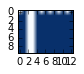

In [23]:
ac1(236,"0100101010101", alto=10)

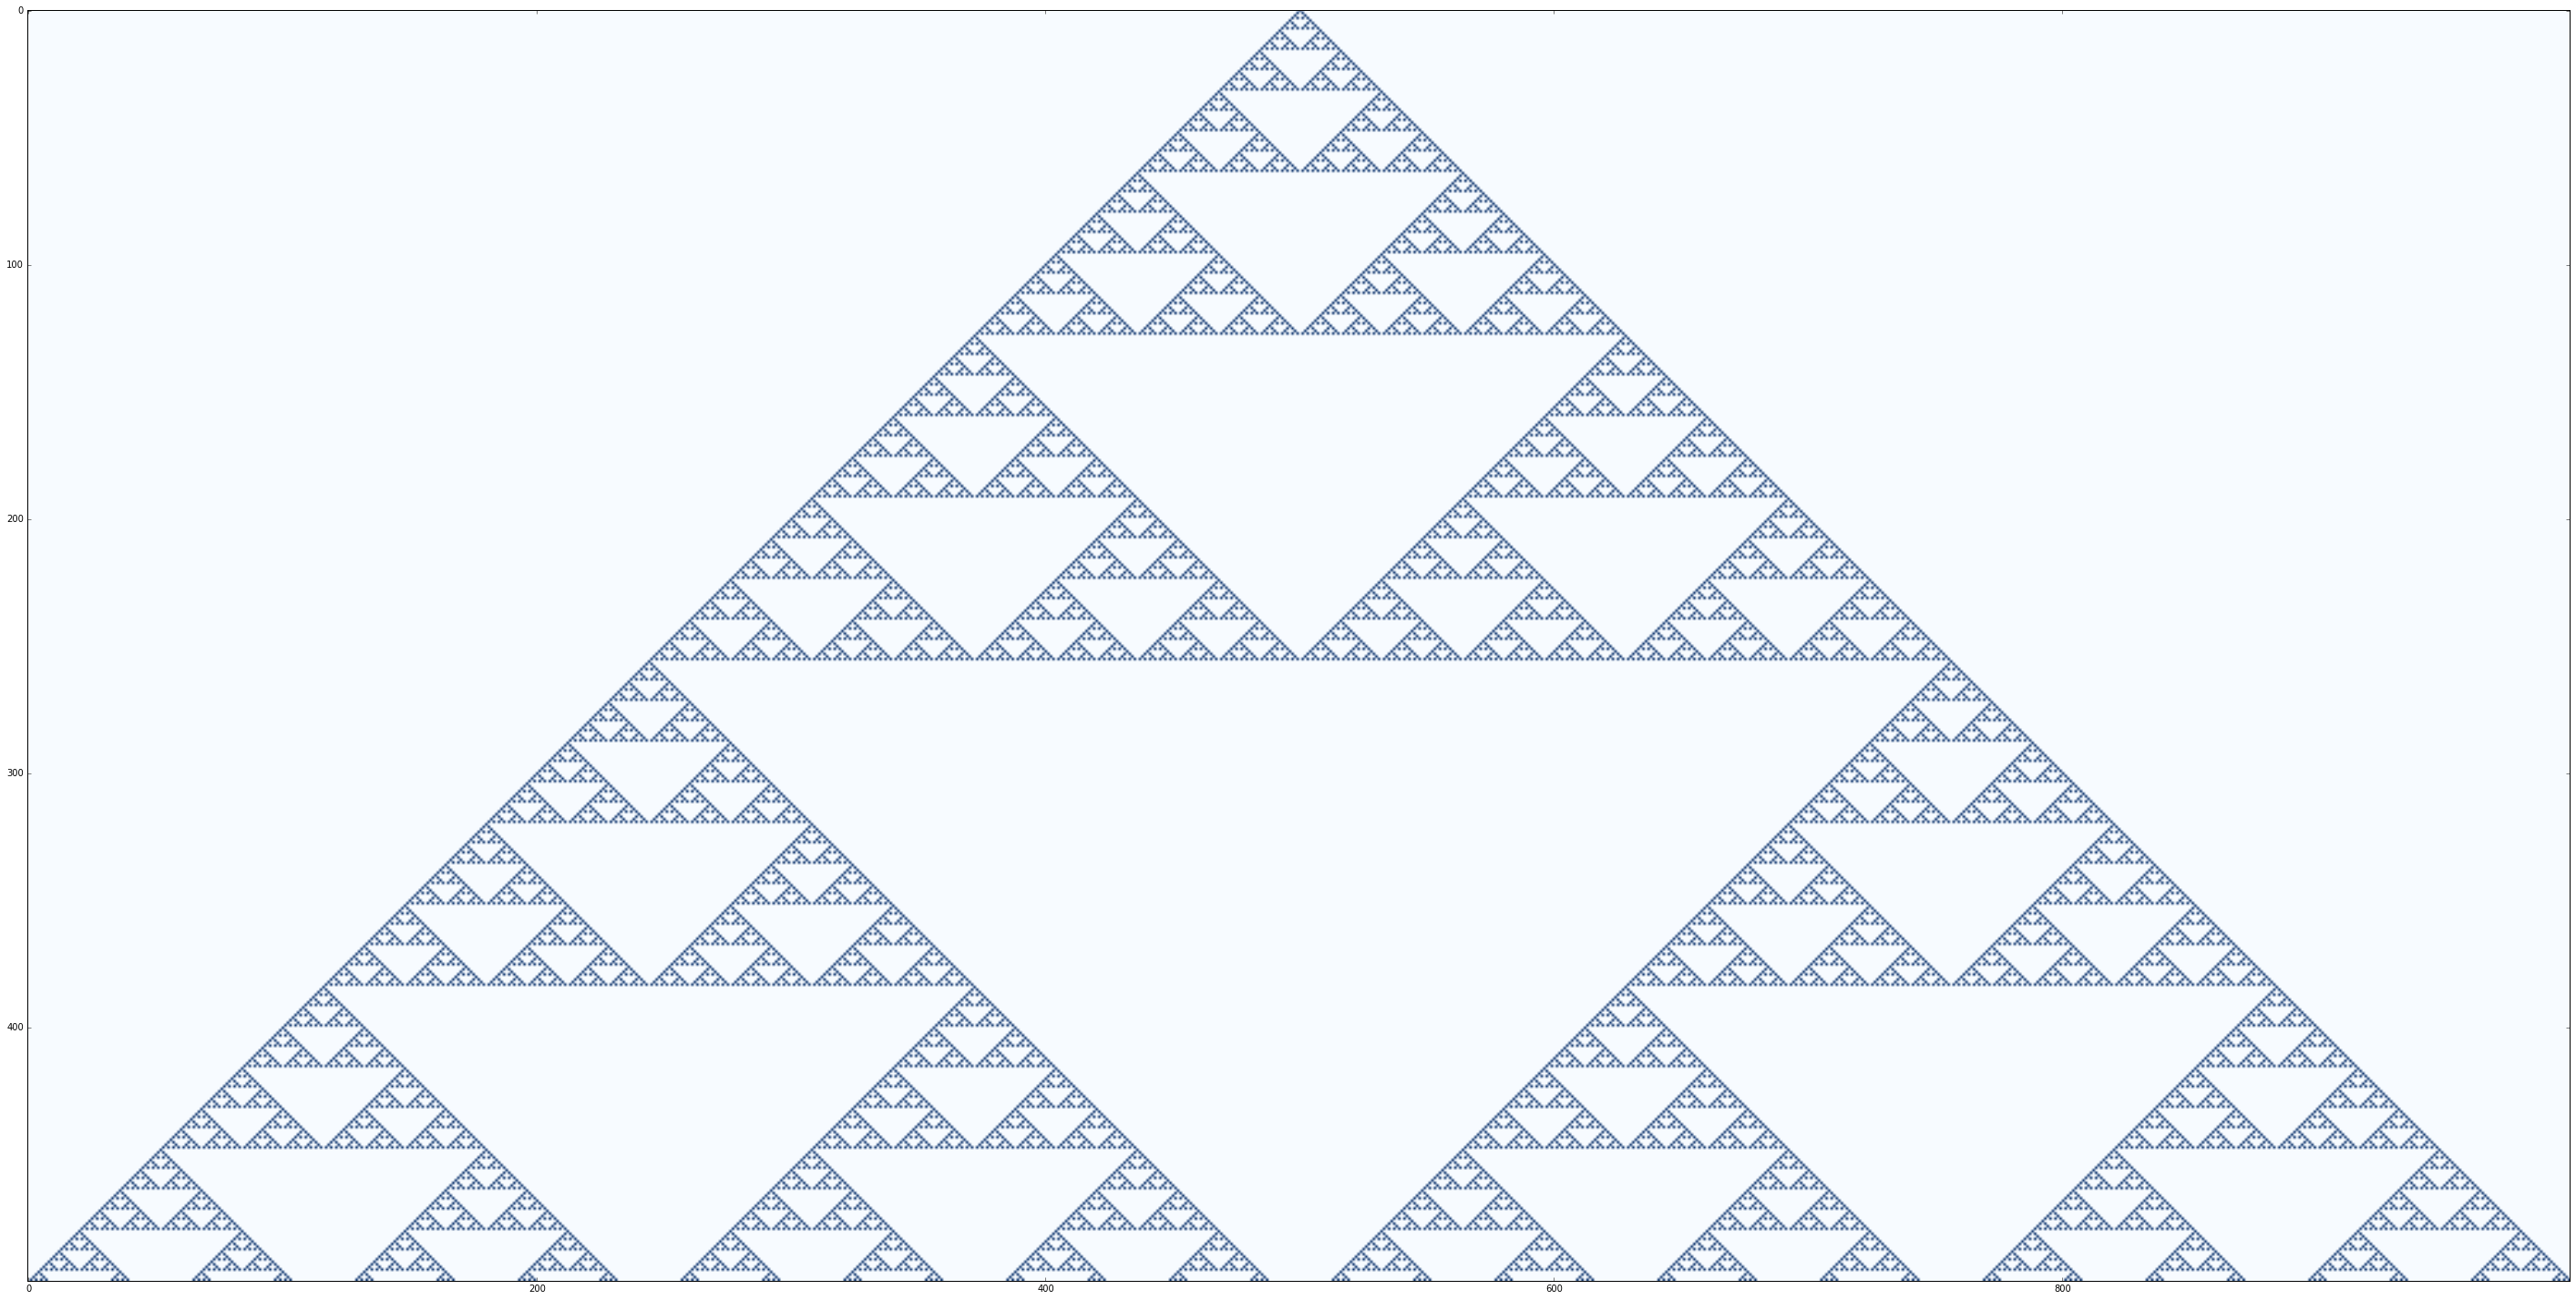

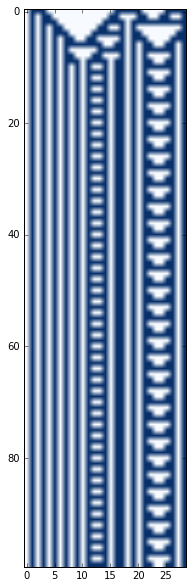

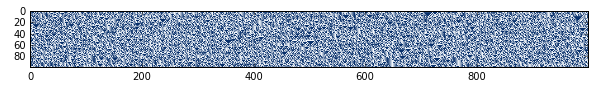

CPU times: user 10.3 s, sys: 105 ms, total: 10.4 s
Wall time: 10.4 s


In [24]:
#probar reglas 30,54,60,62,90,94,102,110,122,126,150,158,182,188,190,220,222,250
%time ac1(90, "central", alto=500, ancho=1000);ac1(94, "01110000000000001111100001111");ac1(alto=100, ancho=1000) # regla 135, E0 azar, 100x100

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

def f(x, y, z, regla):
    return regla & (1 << (x << 2 | y << 1 | z))    

def ac1_1(regla=135, E0="azar", alto=100, ancho=100):
    fig = plt.figure(figsize=(alto/10,ancho/10))
    E = np.zeros((alto, ancho), dtype=np.bool_)        
    if E0 == "central":
        E[0, int(ancho / 2)] = 1  # 1 central
    elif E0[0] in ['0','1']:
        ancho = len(E0)
        E = np.zeros((alto, ancho), dtype=np.bool_)
        for r in range(256):
            E[0, :] = np.array(list(E0))
    else:
        E[0, :] = np.round(np.random.rand(1, ancho))  # renglon aleatorio
    for i in range(1, alto):
        x = np.roll(E[i-1], 1, axis=0)
        y = E[i-1]
        z = np.roll(E[i-1],-1, axis=0)
        E[i] = f(x,y,z,regla)
    plt.imshow(E, cmap=cm.Blues)
    plt.show()

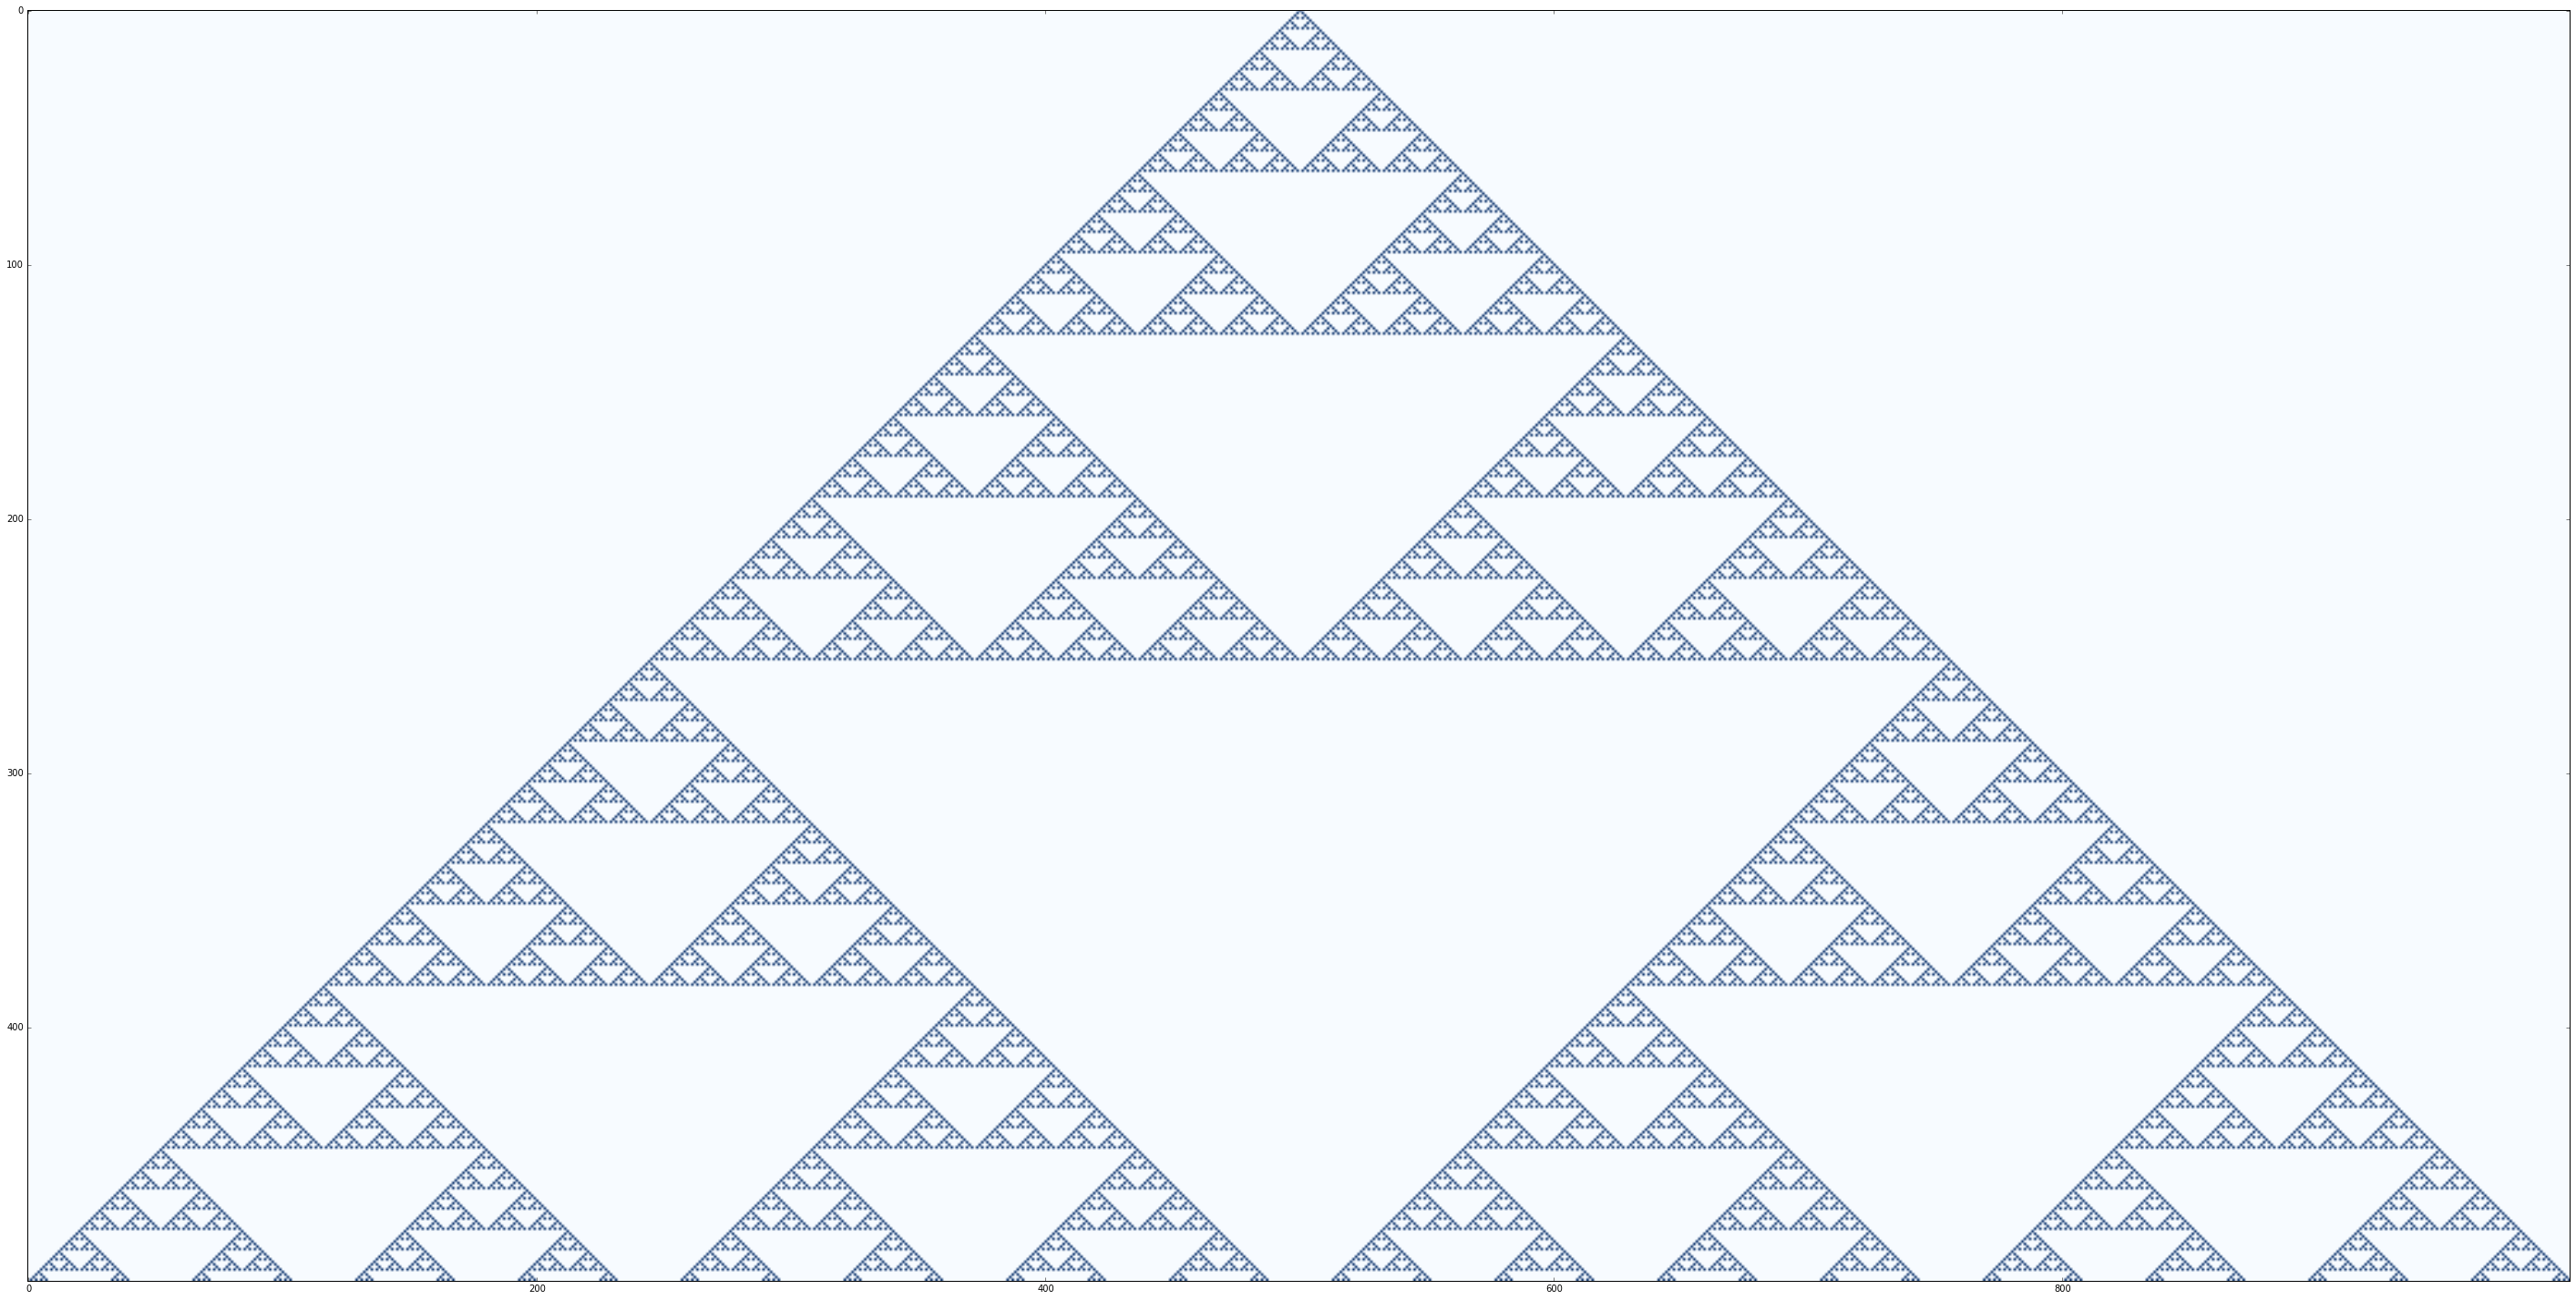

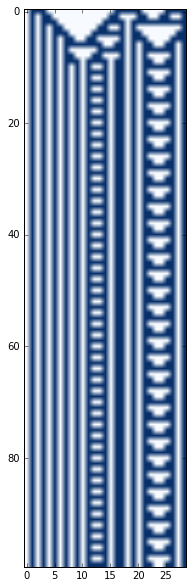

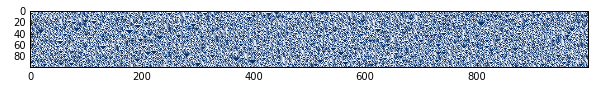

CPU times: user 6.97 s, sys: 65.4 ms, total: 7.03 s
Wall time: 7.03 s


In [26]:
%time ac1_1(90, "central", alto=500, ancho=1000);ac1_1(94, "01110000000000001111100001111");ac1_1(alto=100, ancho=1000) # regla 135, E0 azar, 100x100

In [29]:
import numpy as np
from bokeh.plotting import figure, output_notebook, show
output_notebook()

def f(x, y, z, regla):
    return regla & (1 << (x << 2 | y << 1 | z))    

def ac1_2(regla=135, E0="azar", alto=100, ancho=100):
    #fig = plt.figure(figsize=(alto/10,ancho/10))
    E = np.zeros((alto, ancho), dtype=np.bool_)        
    if E0 == "central":
        E[0, int(ancho / 2)] = 1  # 1 central
    elif E0[0] in ['0','1']:
        ancho = len(E0)
        E = np.zeros((alto, ancho), dtype=np.bool_)
        E[0, :] = np.array(list(E0))
    else:
        E[0, :] = np.round(np.random.rand(1, ancho))  # renglon aleatorio
    for i in range(1, alto):
        x = np.roll(E[i-1], 1, axis=0)
        y = E[i-1]
        z = np.roll(E[i-1],-1, axis=0)
        E[i] = f(x,y,z,regla)
    p = figure(plot_width=300, plot_height=300)# bokeh 10x más rápida que matplotlib!!!
    E=1-E[::-1] # invierte colores y dirección de graficado
    p.image(image=[E], x=0, y=0, dw=ancho, dh=alto)
    show(p)

Loading BokehJS ...

In [31]:
%time ac1_2(90, "central", alto=500, ancho=1000);ac1_2(94, "01110000000000001111100001111");ac1_2(alto=100, ancho=1000) # regla 135, E0 azar, 100x100

CPU times: user 497 ms, sys: 48.9 ms, total: 546 ms
Wall time: 543 ms


In [32]:
import numpy as np
from bokeh.plotting import figure, output_notebook, show
output_notebook()

def f(x, y, z, regla):
    return regla & (1 << (x << 2 | y << 1 | z))    

def ac1_3(regla=135, E0="azar", alto=100, ancho=100):
    #fig = plt.figure(figsize=(alto/10,ancho/10))
    E = np.zeros((alto, ancho), dtype=np.bool_)        
    if E0 == "central":
        E[0, int(ancho / 2)] = 1  # 1 central
    elif E0[0] in ['0','1']:
        ancho = len(E0)
        E = np.zeros((alto, ancho), dtype=np.bool_)
        for r in range(256):
            E[0, :] = np.array(list(E0))
    else:
        E[0, :] = np.round(np.random.rand(1, ancho))  # renglon aleatorio
    for i in range(1, alto):
        x = np.roll(E[i-1], 1, axis=0)
        y = E[i-1]
        z = np.roll(E[i-1],-1, axis=0)
        E[i] = f(x,y,z,regla)
    p = figure(plot_width=300, plot_height=300)# bokeh 10x más rápida que matplotlib!!!
    a,b=np.where(E==1)
    p.cross(a,b,size=.6, color="navy", alpha=0.5)
    show(p)

Loading BokehJS ...

In [36]:
%time ac1_3(90, "central", alto=50, ancho=100);ac1_3(94, "01110000000000001111100001111");ac1_3(alto=100, ancho=1000) # regla 135, E0 azar, 100x100

CPU times: user 509 ms, sys: 15.7 ms, total: 525 ms
Wall time: 522 ms
